In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

In [5]:
# 1. Load an audio file (replace with your own file path)
# Example: you can upload a short .wav file like 'guitar_note.wav'
fs, data = wavfile.read("/Users/partha/Desktop/harvard.wav")

# If stereo, take one channel
if data.ndim > 1:
    data = data[:, 0]

# Normalize for plotting
data = data / np.max(np.abs(data))

/var/folders/1h/l0b4xwk56vv43j_5ffpgpf340000gn/T/ipykernel_8114/873453413.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read("/Users/partha/Desktop/harvard.wav")


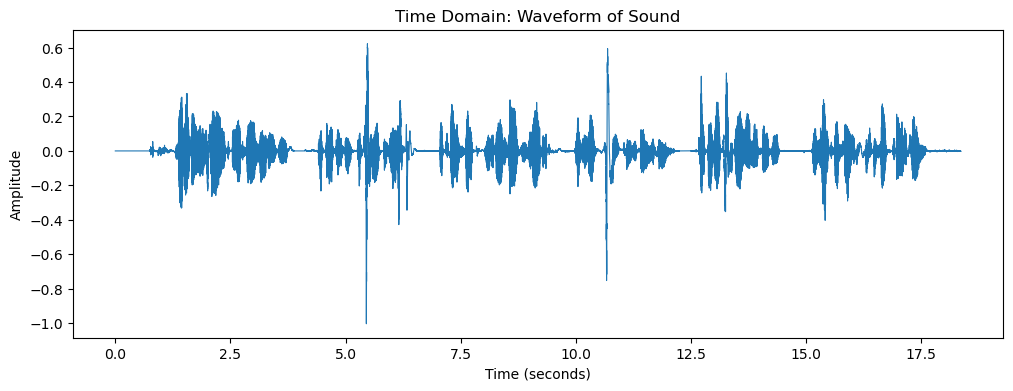

In [6]:
# 2. Plot the waveform (time domain)
duration = len(data) / fs
time = np.linspace(0, duration, len(data))

plt.figure(figsize=(12, 4))
plt.title("Time Domain: Waveform of Sound")
plt.plot(time, data, linewidth=0.8)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

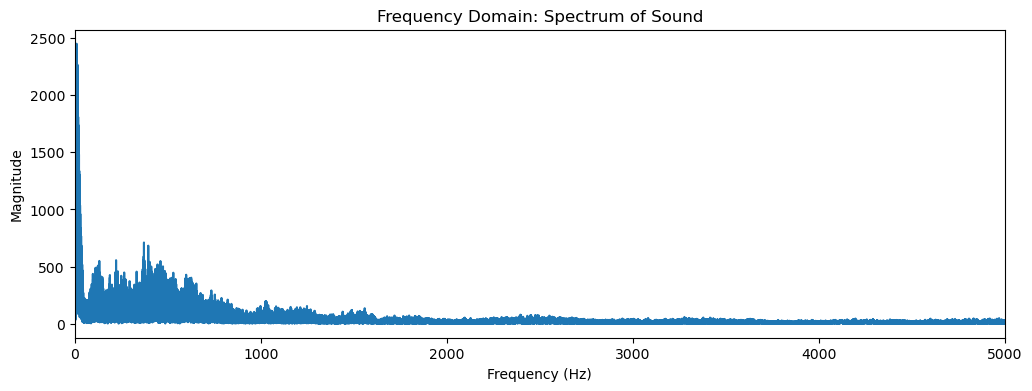

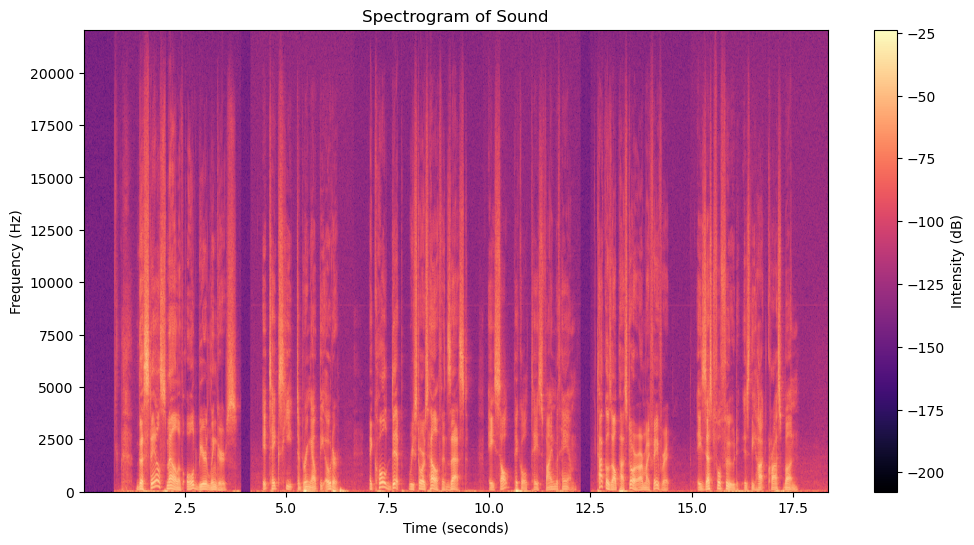

In [7]:

# 3. Compute Fourier Transform (FFT)
fft_data = fft(data)
frequencies = fftfreq(len(fft_data), 1/fs)

# Take only the positive frequencies
positive_freqs = frequencies[:len(frequencies)//2]
magnitude = np.abs(fft_data[:len(frequencies)//2])

# 4. Plot frequency spectrum
plt.figure(figsize=(12, 4))
plt.title("Frequency Domain: Spectrum of Sound")
plt.plot(positive_freqs, magnitude)
plt.xlim(0, 5000)  # show up to 5 kHz for clarity
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# 5. Plot spectrogram (frequency vs time)
plt.figure(figsize=(12, 6))
plt.specgram(data, Fs=fs, NFFT=1024, noverlap=512, cmap="magma")
plt.title("Spectrogram of Sound")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Intensity (dB)")
plt.show()